# Trabalho de Mineração de Dados
Alunos:
- Felipe Martins
- Caio Righetto

### Processamento dos dados

In [1]:
#fazendo os imports necessarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_raw = pd.read_csv("..\data\smoking_driking_dataset_Ver01.csv")

In [3]:
df_raw.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df_raw['sex'].value_counts()

sex
Male      526415
Female    464931
Name: count, dtype: int64

In [6]:
mediaAlturaM = df_raw[df_raw['sex'] == 'Male']['height'].mean()

mediaAlturaM

168.54611855665206

In [7]:
mediaAlturaF = df_raw[df_raw['sex'] == 'Female']['height'].mean()

mediaAlturaF

155.10127309213624

In [9]:
#vamos normalizar a coluna sexo, fazendo com que Male = 1 e Female = 0
df_normalized = df_raw

df_normalized['sex'] = df_normalized['sex'].map({'Male': 1, 'Female': 0})

In [10]:
#vamos normalizar a coluna DRK_YN, fazendo com que Y = 1 e N = 0
df_normalized['DRK_YN'] = df_normalized['DRK_YN'].map({'Y': 1, 'N': 0})

In [11]:
#vamos normalizar tambem a coluna SMK_stat_type_cd, fazendo com que 1 vire 0 e 2 e 3 virem 1
df_normalized['SMK_stat_type_cd'] = df_normalized['SMK_stat_type_cd'].map({1: 0, 2: 1, 3:1})

In [12]:
df_normalized.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,1,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0,0


### EDA

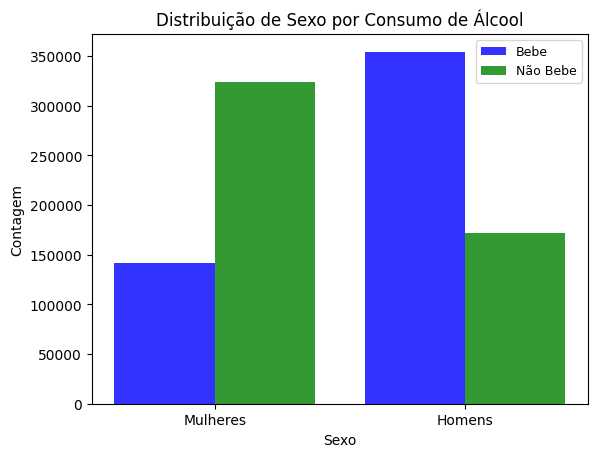

In [24]:
# Criar um DataFrame que relaciona sexo e se bebe ou nao
subset_data = df_normalized[['sex', 'DRK_YN']]

bebe = subset_data[subset_data['DRK_YN'] == 1]
nao_bebe = subset_data[subset_data['DRK_YN'] == 0]

plt.hist([bebe['sex'], nao_bebe['sex']], bins=[0, 1, 2], alpha=0.8, color=['blue', 'green'], label=['Bebe', 'Não Bebe'])
plt.xticks([0.5, 1.5], ['Mulheres', 'Homens'])  # Definir os rótulos do eixo x

plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.title('Distribuição de Sexo por Consumo de Álcool')
plt.legend(prop={'size':9})

plt.show()

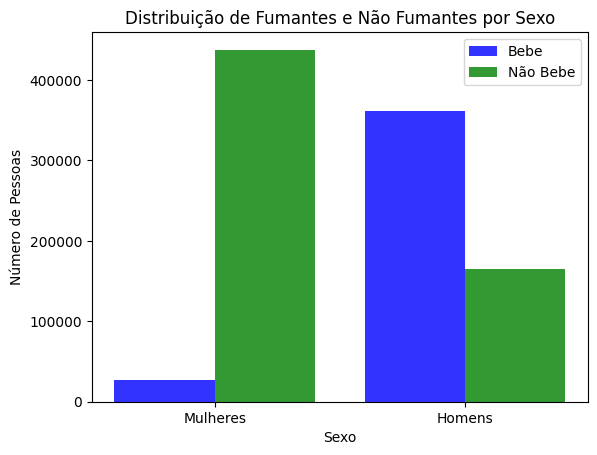

In [31]:
# Criar um histograma de fumantes e nao fumantes

# Criar um DataFrame que relaciona sexo e se fuma ou nao
subset_data = df_normalized[['sex', 'SMK_stat_type_cd']]

fuma = subset_data[subset_data['SMK_stat_type_cd'] == 1]
nao_fuma = subset_data[subset_data['SMK_stat_type_cd'] == 0]

# Criar um gráfico de barras
categorias = ['Mulheres', 'Homens']

plt.hist([fuma['sex'], nao_fuma['sex']], bins=[0, 1, 2], alpha=0.8, color=['blue', 'green'], label=['Bebe', 'Não Bebe'])

plt.xlabel('Sexo')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Fumantes e Não Fumantes por Sexo')
plt.xticks([0.5, 1.5], categorias)
plt.legend()
plt.show()

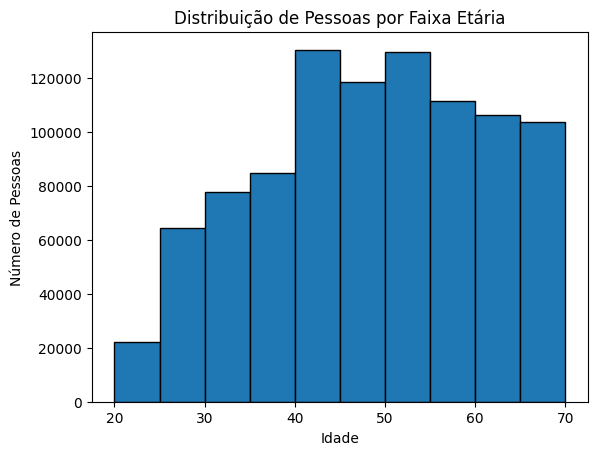

In [32]:
# histograma de distribuição de pessoas por faixa etária

faixa_etaria = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

plt.hist(df_normalized['age'], bins=faixa_etaria, edgecolor='black')

plt.xlabel('Idade')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas por Faixa Etária')

plt.show()

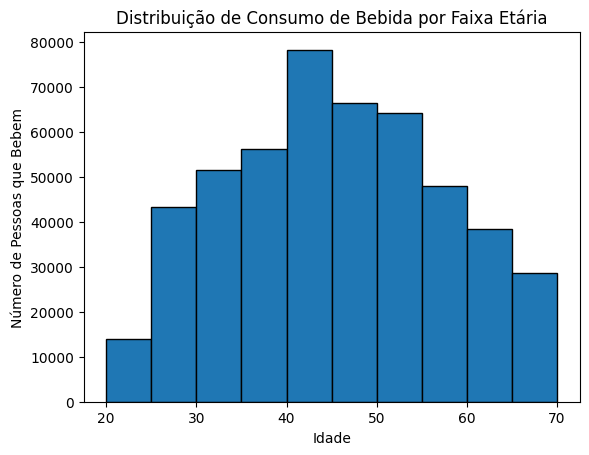

In [34]:
#Criar um grafico de barras para relacionar consumo de alcool com faixa etaria

dados_bebe = df_normalized[df_normalized['DRK_YN'] == 1]

faixa_etaria = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

plt.hist(dados_bebe['age'], bins=faixa_etaria, edgecolor='black')

plt.xlabel('Idade')
plt.ylabel('Número de Pessoas que Bebem')
plt.title('Distribuição de Consumo de Bebida por Faixa Etária')

plt.show()

### Modelagem Apriori

In [14]:
#import apyori

In [15]:
#celulas_preenchidas = df_normalized.notna().apply(sum, axis=1)

#celulas_preenchidas

In [16]:
""" 
registros = [set(linha.dropna()) for _, linha in df_normalized[celulas_preenchidas > 1].iterrows()]
registros[:5]
minsup = 0.04
minconf = 0.3

regras_associacao = apyori.apriori(registros, min_support=minsup, min_confidence=minconf)


for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f'{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}'
      f' Confianca: {regra.ordered_statistics[0].confidence:.3f}'
  )
"""

" \nregistros = [set(linha.dropna()) for _, linha in df_normalized[celulas_preenchidas > 1].iterrows()]\nregistros[:5]\nminsup = 0.04\nminconf = 0.3\n\nregras_associacao = apyori.apriori(registros, min_support=minsup, min_confidence=minconf)\n\n\nfor regra in regras_associacao:\n  itens = list(regra.items)\n  print(\n      f'{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}'\n      f' Confianca: {regra.ordered_statistics[0].confidence:.3f}'\n  )\n"

### Modelagem Regressão Logística

In [17]:
#fazendo os imports necessarios
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#definindo as variavels alvo
y = df_normalized['DRK_YN']
x = df_normalized.drop('DRK_YN',axis=1)

#separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)


In [18]:
modelo_LR = LogisticRegression()
modelo_LR.fit(X_train,y_train)
y_pred = modelo_LR.predict(X_test)


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#printando os scores obtidos
print("Pontuacao obtida com X e Y de treino: ", modelo_LR.score(X_train,y_train))
print("Pontuacao obtida com X e Y de teste: ", modelo_LR.score(X_test,y_test))
print("Pontuacao obtida com Y da previsão e o Y real: " , accuracy_score(y_test,y_pred))

Pontuacao obtida com X e Y de treino:  0.7075778361720693
Pontuacao obtida com X e Y de teste:  0.7069148131336057
Pontuacao obtida com Y da previsão e o Y real:  0.7069148131336057


In [20]:
#printando a importancia das features
coeficients = modelo_LR.coef_[0]
feature_names = x.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coeficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
16,hemoglobin,0.207651
22,SMK_stat_type_cd,0.207237
0,sex,0.184692
3,weight,0.056108
13,HDL_chole,0.020077
21,gamma_GTP,0.015887
18,serum_creatinine,0.015489
9,SBP,0.002687
19,SGOT_AST,0.001519
15,triglyceride,0.001225


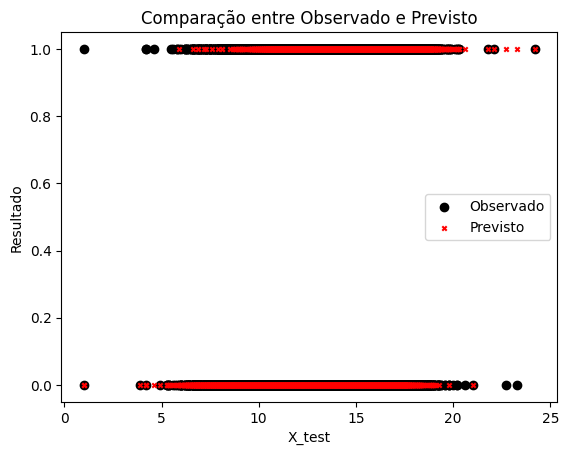

In [21]:
plt.scatter(X_test['hemoglobin'], y_test, color='black', label='Observado')
plt.scatter(X_test['hemoglobin'], y_pred, color='red', marker='x', label='Previsto',s=10)
plt.xlabel('X_test')
plt.ylabel('Resultado')
plt.legend()
plt.title('Comparação entre Observado e Previsto')
plt.show()

### Modelagem Catboost

In [35]:
# Separar features e rótulos
X = df_normalized.drop(columns=['DRK_YN'])
y = df_normalized['DRK_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', cat_features=[])

model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=50)

0:	learn: 0.6629511	test: 0.6628467	best: 0.6628467 (0)	total: 205ms	remaining: 1m 42s
50:	learn: 0.5231734	test: 0.5235010	best: 0.5235010 (50)	total: 3.08s	remaining: 27.1s
100:	learn: 0.5175734	test: 0.5181696	best: 0.5181696 (100)	total: 6s	remaining: 23.7s
150:	learn: 0.5150509	test: 0.5159992	best: 0.5159992 (150)	total: 8.81s	remaining: 20.4s
200:	learn: 0.5133075	test: 0.5147622	best: 0.5147622 (200)	total: 11.8s	remaining: 17.5s
250:	learn: 0.5120684	test: 0.5140456	best: 0.5140456 (250)	total: 14.9s	remaining: 14.8s
300:	learn: 0.5110673	test: 0.5135835	best: 0.5135835 (300)	total: 17.9s	remaining: 11.8s
350:	learn: 0.5102119	test: 0.5132913	best: 0.5132913 (350)	total: 20.7s	remaining: 8.8s
400:	learn: 0.5094463	test: 0.5130528	best: 0.5130528 (400)	total: 23.6s	remaining: 5.83s
450:	learn: 0.5087512	test: 0.5129207	best: 0.5129175 (449)	total: 26.7s	remaining: 2.9s
499:	learn: 0.5081207	test: 0.5128284	best: 0.5128257 (498)	total: 29.6s	remaining: 0us

bestTest = 0.51282566

In [37]:
from sklearn.metrics import accuracy_score

predicoes = model.predict(X_test)

precisao = accuracy_score(y_test, predicoes)
print(f'Precisão do modelo: {precisao:.2f}')


Precisão do modelo: 0.74


In [38]:
importancias_features = model.feature_importances_

nomes_features = X.columns

importancias_df = pd.DataFrame(list(zip(nomes_features, importancias_features)), columns=['Feature', 'Importância'])

importancias_df = importancias_df.sort_values(by='Importância', ascending=False)

importancias_df

,Feature,Importância
1,age,22.527525
21,gamma_GTP,19.550073
0,sex,12.703390
13,HDL_chole,9.785088
22,SMK_stat_type_cd,9.500303
20,SGOT_ALT,7.680877
2,height,3.037309
19,SGOT_AST,2.830503
15,triglyceride,1.927252
14,LDL_chole,1.650996


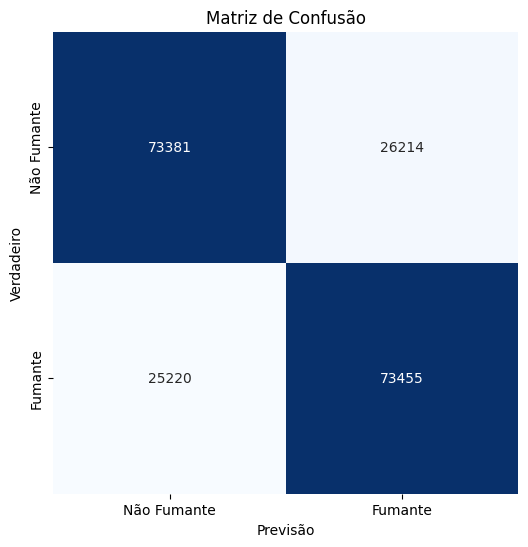

In [40]:
#calcular a matriz de confusão
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, predicoes)

plt.figure(figsize=(6, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['Não Fumante', 'Fumante'], yticklabels=['Não Fumante', 'Fumante'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()
